# Le Bagging ou Bootstrap AGGregatING

Le But est de créer plusieurs copies d'un même model, en entraînant chaque copie sur une partie *aléatiore* du dataset. l'exemple le plus connu est Random Forest qui s'entraîne avec plusieur décison tree sur randomisation des datasets.

# Random Forest

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<Axes: xlabel='Signal', ylabel='Density'>

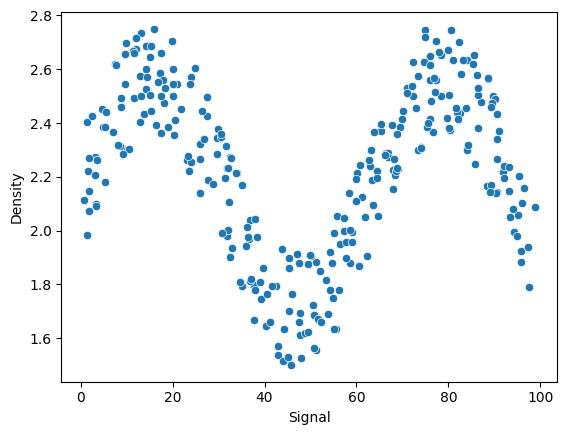

In [3]:
df.columns = ['Signal', 'Density']
sns.scatterplot(x='Signal', y='Density', data=df)

In [9]:
from sklearn.model_selection import train_test_split

X = df['Signal'].values.reshape(-1, 1)
y = df['Density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn .metrics import mean_squared_error, mean_absolute_error

def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')

    signal = np.arange(0,100)
    output = model.predict(signal.reshape(-1, 1))

    plt.figure(figsize=(10, 8), dpi=100)
    sns.scatterplot(x='Signal', y='Density', data=df, label='Data')
    plt.plot(signal, output, label='Model Output',c='red')
    plt.legend()
    plt.show()

RMSE: 0.33
MAE: 0.27


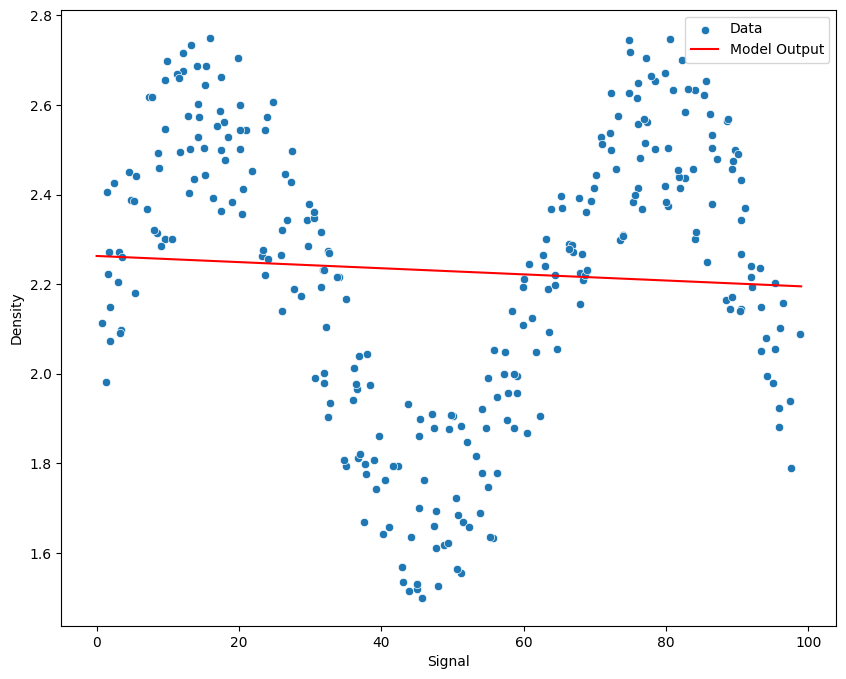

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
run_model(model_lr, X_train, y_train, X_test, y_test)

RMSE: 0.14
MAE: 0.12


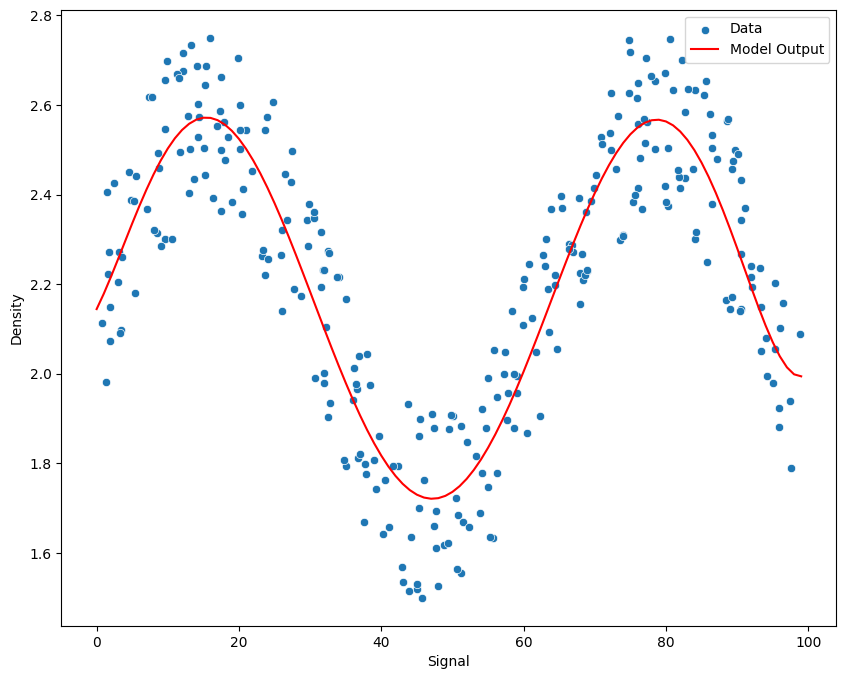

In [20]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

RMSE: 0.17
MAE: 0.15


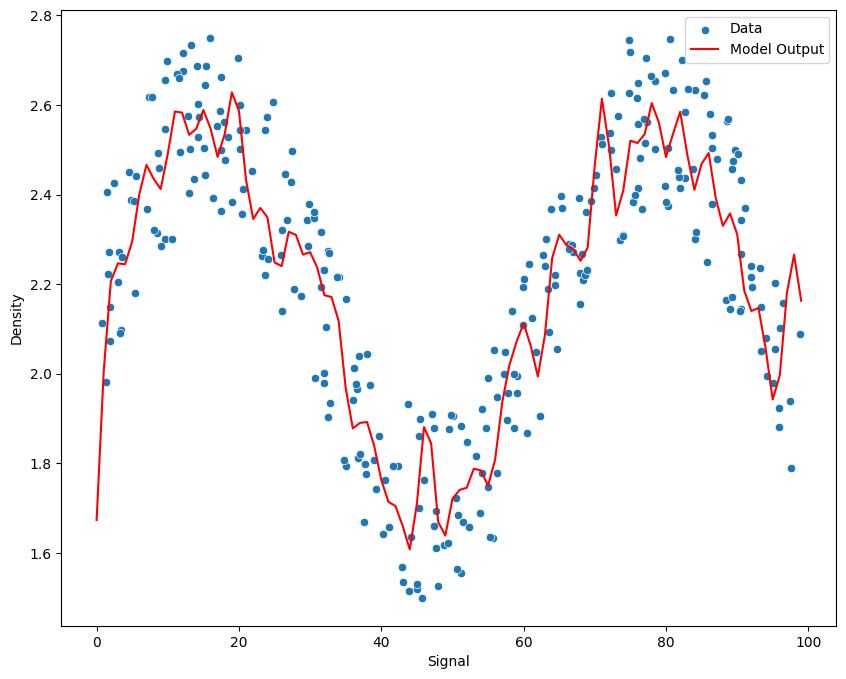

In [24]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
run_model(svr, X_train, y_train, X_test, y_test)

RMSE: 0.16
MAE: 0.13


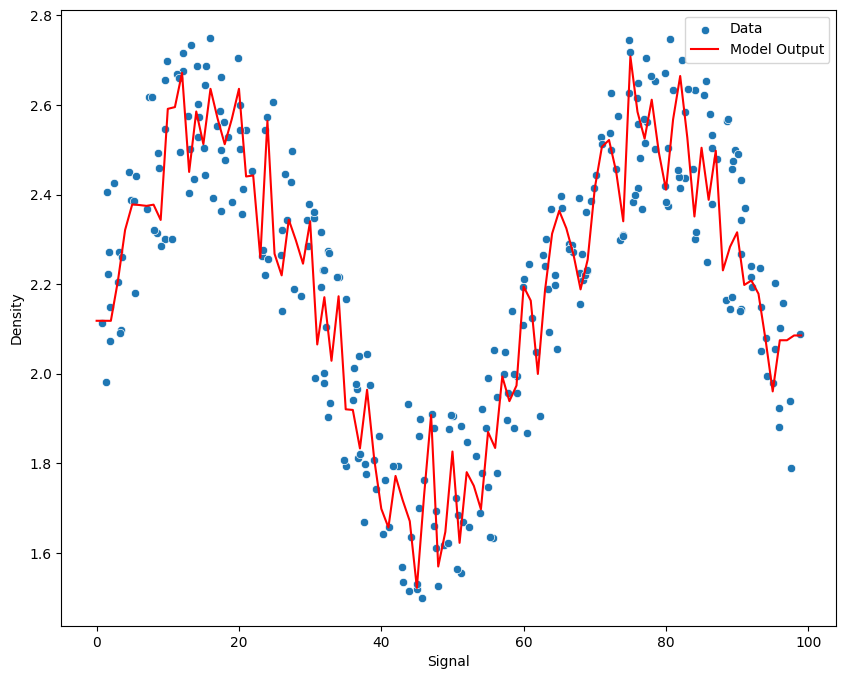

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state=42)
run_model(rf, X_train, y_train, X_test, y_test)

# Boosting

Le Boosting est une technique de modélisation qui vise à améliorer les performances de modèles de Machine Learning simples en les combinant de manière itérative pour former un modèle plus robuste et plus puissant.
Contrairement à d'autres méthodes qui utilisent des modèles indépendants, le boosting construit de manière récursive une série de modèles faibles, chacun concentrant ses efforts sur les observations mal prédites par le modèle précédent.

Le processus de boosting commence par :

- la création d'un modèle faible, généralement une règle de décision simple.
- À chaque itération, de nouveaux modèles faibles sont construits, en mettant davantage l'accent sur les observations mal prédites par les modèles précédents.
- Ces modèles sont ensuite combinés en un seul modèle plus performant en attribuant des poids à chaque modèle basés sur leur précision respective.
(Par faible, il est sous-entendu une règle de décision dont le taux d’erreur est légèrement meilleur que celui d’une règle purement aléatoire.)

Chaque estimateur est une version améliorée du précédent, qui vise à donner plus de poids aux observations mal ajustées ou mal prédites.
Ainsi à chaque itération, l'évaluation de l'estimateur permet un ré-échantillonnage des données, avec un poids plus important donné aux observations mal prédites.
L’estimateur construit à l’étape i concentrera donc ses efforts sur les observations mal ajustées par l’estimateur à l’étape i − 1.
Enfin les classifieurs sont combinés, et pondérés par des coefficients associés à leurs performances predictives respectives.

In [26]:
df = pd.read_csv('data/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<Axes: xlabel='class', ylabel='count'>

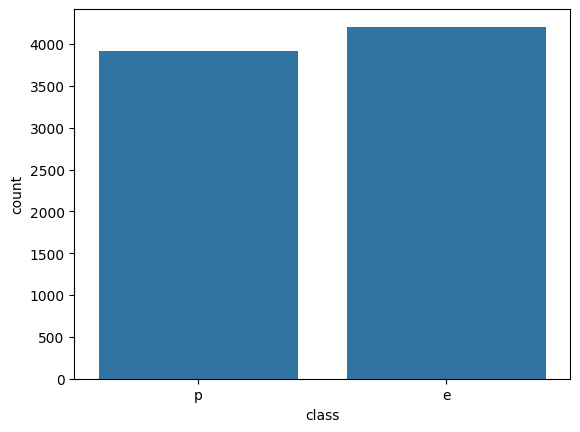

In [27]:
sns.countplot(x='class', data=df)

In [28]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [29]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(df.drop('class', axis=1),drop_first=True)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.ensemble import AdaBoostClassifier

Ada = AdaBoostClassifier(n_estimators=10, random_state=42)
Ada.fit(X_train, y_train)


,"estimator estimator: object, default=NoneThe base estimator from which the boosted ensemble is built.Support for sample weighting is required, as well as proper``classes_`` and ``n_classes_`` attributes. If ``None``, thenthe base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`initialized with `max_depth=1`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",None
,"n_estimators n_estimators: int, default=50The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.Values must be in the range `[1, inf)`.",10
,"learning_rate learning_rate: float, default=1.0Weight applied to each classifier at each boosting iteration. A higherlearning rate increases the contribution of each classifier. There isa trade-off between the `learning_rate` and `n_estimators` parameters.Values must be in the range `(0.0, inf)`.",1.0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given at each `estimator` at eachboosting iteration.Thus, it is only used when `estimator` exposes a `random_state`.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42


In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, Ada.predict(X_test)))

              precision    recall  f1-score   support

           e       0.96      0.79      0.87       843
           p       0.81      0.97      0.88       782

    accuracy                           0.88      1625
   macro avg       0.89      0.88      0.88      1625
weighted avg       0.89      0.88      0.88      1625



In [39]:
err_iter = []

for i in range(1, 101):
    Ada = AdaBoostClassifier(n_estimators=i, random_state=42)
    Ada.fit(X_train, y_train)
    err_iter.append(1 - accuracy_score(y_test, Ada.predict(X_test)))

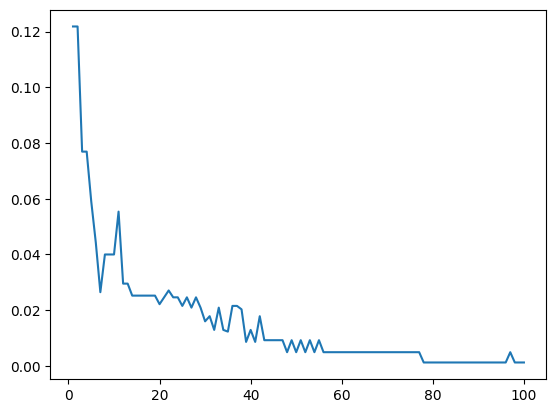

In [40]:
plt.plot(range(1, 101), err_iter)